In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("ticks")
plt.style.use('dark_background')


Are there any markets where songs are less available to be purchased? - trackInfo_Available Markets

(8197479, 2)

In [2]:
track_data = pd.read_csv('trackInfo_AvailableMarkets.csv')
track_data = track_data.dropna()
track_data.head(5)

,0,track.id
0,AR,4cgjA7B4fJBHyB9Ya2bu0t
1,AU,4cgjA7B4fJBHyB9Ya2bu0t
2,AT,4cgjA7B4fJBHyB9Ya2bu0t
3,BE,4cgjA7B4fJBHyB9Ya2bu0t
4,BO,4cgjA7B4fJBHyB9Ya2bu0t


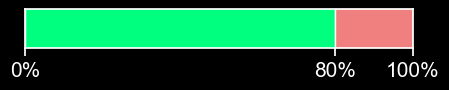

In [166]:
percent = track_data.groupby("0").get_group("BY").shape[0] / track_data["track.id"].nunique()
percent = 1 - percent
plt.figure(figsize=(5, .5))  # Adjusted figsize for horizontal plot
# Stacked
plt.barh(0, 1-percent, color='springgreen')  # Horizontal bar for available tracks
plt.barh(0, percent, left=1-percent, color='lightcoral')  # Horizontal bar for unavailable tracks

xticks = ['0%','80%', '100%']
plt.xticks([0, .8, 1], xticks, fontsize=15)
plt.yticks([])  # No yticks for this plot
plt.ylim(-.2, .2)  # Adjusted for horizontal plot
plt.xlim(0, 1)  # Adjusted for horizontal plot
plt.savefig("Belarus.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()


In [168]:
track_data.groupby("0").get_group("BY").shape[0]

38544

In [167]:
track_data["track.id"].nunique()

48132

In [16]:
track_value_counts = track_data['0'].value_counts()
track_value_counts.head(5)

0
US    47726
CA    46832
MX    46335
CR    45619
NI    45483
Name: count, dtype: int64

In [17]:
track_counts_mean = track_value_counts.mean()
track_value_counts = track_value_counts.apply(lambda x: x - track_counts_mean)
track_value_counts.sort_values(ascending=True, inplace=True)
track_value_counts.head(5)

0
BY   -6250.967213
GE   -1026.967213
BF    -997.967213
UZ    -992.967213
VU    -975.967213
Name: count, dtype: float64

In [82]:
track_value_counts

0
BY   -6250.967213
GE   -1026.967213
BF    -997.967213
UZ    -992.967213
VU    -975.967213
         ...     
NI     688.032787
CR     824.032787
MX    1540.032787
CA    2037.032787
US    2931.032787
Name: count, Length: 183, dtype: float64

In [106]:
track_difference = pd.DataFrame(track_value_counts)
track_difference.columns = ['Difference']
track_difference['Country'] = track_difference.index
# convert Country to iso_a3
track_difference = track_difference.merge(isomap, left_on='Country', right_on='Alpha-2 code')
track_difference.reset_index(drop=True, inplace=True)
print(track_difference.isna().sum())
track_difference.head(5)

Difference      0
Country_x       0
Country_y       0
Alpha-2 code    0
Alpha-3 code    0
Numeric         0
dtype: int64


,Difference,Country_x,Country_y,Alpha-2 code,Alpha-3 code,Numeric
0,-6250.967213,BY,Belarus,BY,BLR,112
1,-1026.967213,GE,Georgia,GE,GEO,268
2,-997.967213,BF,Burkina Faso,BF,BFA,854
3,-992.967213,UZ,Uzbekistan,UZ,UZB,860
4,-975.967213,VU,Vanuatu,VU,VUT,548


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


C:\Users\djx3rn\AppData\Local\Temp\ipykernel_13964\3913268019.py:4: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.

C:\Users\djx3rn\AppData\Local\Temp\ipykernel_13964\3913268019.py:10: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



(-18491143.68863403, 18491143.68863403, -6612227.92314729, 9055157.537062025)

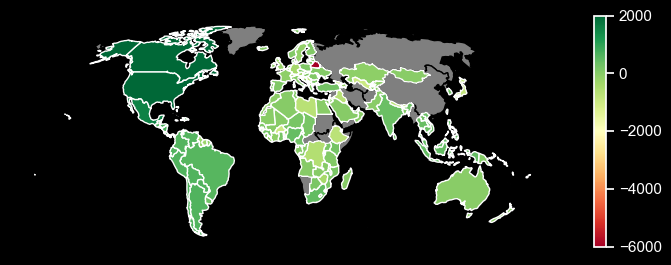

In [170]:
# generate chloropleth map using "0" as country code and track_value_counts as the value
import geopandas as gpd

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.merge(track_difference, left_on='iso_a3', right_on='Alpha-3 code')

fig, ax = plt.subplots(1, 1, figsize=(10, 3))
world.to_crs('+proj=robin').plot(column='Difference', cmap='RdYlGn', legend=True, ax=ax, vmin=-6000, vmax=2000)

missing = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
missing = missing[(missing.pop_est > 0) & (missing.name != "Antarctica")]
missing.to_crs('+proj=robin').plot(color=(1, 1, 1, 0.5), ax=ax, legend=True,zorder=0, edgecolor='black')
plt.axis('off')



In [22]:
track_value_counts.to_csv('market_difference.csv')

How did music length change over time? - trackInfo

What is the breakdown of genre's organized by time and genre? - trackInfo

What is the most popular genre by artist popularity? - artistInfo

Lexical Analysis - episodeInfo

Tracks included in similar playlist names - Playlists

Tracks that show up between playlists - Playlists

Similarity of streaming throughout the day between people - StreamingHistory_music